In [106]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('plotting_data', index_col = [0])
data.head()

,year,round,division,local_goals,visitor_goals,points_local,wins_local,draws_local,losses_local,gf_local,...,pos_local,points_visitor,wins_visitor,draws_visitor,losses_visitor,gf_visitor,ga_visitor,avg_visitor,pos_visitor,match_winner
0,2016,2,1,3,1,1,0.0,1.0,0.0,1,...,7,3,1.0,0.0,0.0,1,0,1.0,5,0
1,2016,2,1,0,0,1,0.0,1.0,0.0,0,...,10,1,0.0,1.0,0.0,0,0,0.0,13,1
2,2016,2,1,1,0,3,1.0,0.0,0.0,1,...,4,1,0.0,1.0,0.0,0,0,0.0,9,0
3,2016,2,1,3,0,3,1.0,0.0,0.0,2,...,2,1,0.0,1.0,0.0,0,0,0.0,11,0
4,2016,2,1,5,0,1,0.0,1.0,0.0,0,...,12,1,0.0,1.0,0.0,1,1,0.0,6,0


In [3]:
data['match_winner'].astype(str)

0       0
1       1
2       0
3       0
4       0
       ..
4657    0
4658    0
4659    2
4660    1
4661    0
Name: match_winner, Length: 4662, dtype: object

In [40]:
data

,year,round,division,local_goals,visitor_goals,points_local,wins_local,draws_local,losses_local,gf_local,...,pos_local,points_visitor,wins_visitor,draws_visitor,losses_visitor,gf_visitor,ga_visitor,avg_visitor,pos_visitor,match_winner
0,2016,2,1,3,1,1,0.0,1.0,0.0,1,...,7,3,1.0,0.0,0.0,1,0,1.0,5,0
1,2016,2,1,0,0,1,0.0,1.0,0.0,0,...,10,1,0.0,1.0,0.0,0,0,0.0,13,1
2,2016,2,1,1,0,3,1.0,0.0,0.0,1,...,4,1,0.0,1.0,0.0,0,0,0.0,9,0
3,2016,2,1,3,0,3,1.0,0.0,0.0,2,...,2,1,0.0,1.0,0.0,0,0,0.0,11,0
4,2016,2,1,5,0,1,0.0,1.0,0.0,0,...,12,1,0.0,1.0,0.0,1,1,0.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4657,2021,38,2,2,1,44,9.0,17.0,11.0,38,...,14,40,9.0,13.0,15.0,35,42,-7.0,19,0
4658,2021,38,2,1,0,39,9.0,12.0,16.0,36,...,20,41,11.0,8.0,18.0,35,43,-8.0,18,0
4659,2021,38,2,1,4,41,10.0,11.0,16.0,25,...,17,58,16.0,10.0,11.0,39,34,5.0,6,2
4660,2021,38,2,1,1,57,16.0,9.0,12.0,43,...,7,62,18.0,8.0,11.0,41,31,10.0,4,1


In [41]:
data = data.drop(['local_goals', 'visitor_goals'], axis=1)
values = data.values[:, :-1]
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(values)
df_datascaled = DataFrame(data_scaled)
df_datascaled = pd.concat([df_datascaled, pd.DataFrame(data['match_winner'])], axis=1)
print(df_datascaled.describe())

                 0            1            2            3            4  \
count  4662.000000  4662.000000  4662.000000  4662.000000  4662.000000   
mean      0.499998     0.500000     0.523810     0.283113     0.246024   
std       0.341603     0.296617     0.499489     0.187544     0.181150   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.199982     0.250000     0.000000     0.133333     0.111111   
50%       0.500000     0.500000     1.000000     0.255556     0.222222   
75%       0.799988     0.750000     1.000000     0.411111     0.333333   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 5            6            7            8            9  \
count  4662.000000  4662.000000  4662.000000  4662.000000  4662.000000   
mean      0.295468     0.249758     0.204321     0.262372     0.396837   
std       0.197789     0.178347     0.137371     0.169110     0.096066   
min       0.000000     0.000000     0

In [42]:
df_datascaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,match_winner
0,0.0,0.0,0.0,0.011111,0.000000,0.052632,0.000000,0.008929,0.011364,0.398438,0.285714,0.033333,0.035714,0.00,0.000000,0.009174,0.000000,0.392308,0.190476,0
1,0.0,0.0,0.0,0.011111,0.000000,0.052632,0.000000,0.000000,0.000000,0.398438,0.428571,0.011111,0.000000,0.05,0.000000,0.000000,0.000000,0.384615,0.571429,1
2,0.0,0.0,0.0,0.033333,0.037037,0.000000,0.000000,0.008929,0.000000,0.406250,0.142857,0.011111,0.000000,0.05,0.000000,0.000000,0.000000,0.384615,0.380952,0
3,0.0,0.0,0.0,0.033333,0.037037,0.000000,0.000000,0.017857,0.011364,0.406250,0.047619,0.011111,0.000000,0.05,0.000000,0.000000,0.000000,0.384615,0.476191,0
4,0.0,0.0,0.0,0.011111,0.000000,0.052632,0.000000,0.000000,0.000000,0.398438,0.523810,0.011111,0.000000,0.05,0.000000,0.009174,0.011236,0.384615,0.238095,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4657,1.0,1.0,1.0,0.488889,0.333333,0.894737,0.407407,0.339286,0.431818,0.398438,0.619048,0.444444,0.321429,0.65,0.576923,0.321101,0.471910,0.330769,0.857143,0
4658,1.0,1.0,1.0,0.433333,0.333333,0.631579,0.592593,0.321429,0.534091,0.312500,0.904762,0.455556,0.392857,0.40,0.692308,0.321101,0.483146,0.323077,0.809524,0
4659,1.0,1.0,1.0,0.455556,0.370370,0.578947,0.592593,0.223214,0.488636,0.257812,0.761905,0.644444,0.571429,0.50,0.423077,0.357798,0.382022,0.423077,0.238095,2
4660,1.0,1.0,1.0,0.633333,0.592593,0.473684,0.444444,0.383929,0.409091,0.453125,0.285714,0.688889,0.642857,0.40,0.423077,0.376147,0.348315,0.461538,0.142857,1


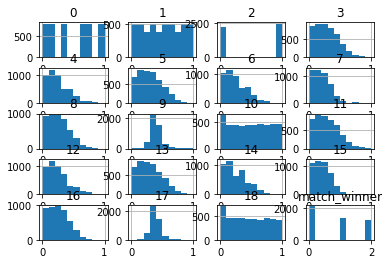

In [43]:
df_datascaled.hist()
plt.show()

# Orden Cosas #

-> Separar en train test split lo primero
-> Hacer mix_max_scaler para X_train solo
-> Entrenar con X_train y y_train
-> Usar min_max_scaler con X_test
-> Predecir con X_test para tener predictions y comparar con y_test


In [46]:
df_datascaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,match_winner
0,0.0,0.0,0.0,0.011111,0.000000,0.052632,0.000000,0.008929,0.011364,0.398438,0.285714,0.033333,0.035714,0.00,0.000000,0.009174,0.000000,0.392308,0.190476,0
1,0.0,0.0,0.0,0.011111,0.000000,0.052632,0.000000,0.000000,0.000000,0.398438,0.428571,0.011111,0.000000,0.05,0.000000,0.000000,0.000000,0.384615,0.571429,1
2,0.0,0.0,0.0,0.033333,0.037037,0.000000,0.000000,0.008929,0.000000,0.406250,0.142857,0.011111,0.000000,0.05,0.000000,0.000000,0.000000,0.384615,0.380952,0
3,0.0,0.0,0.0,0.033333,0.037037,0.000000,0.000000,0.017857,0.011364,0.406250,0.047619,0.011111,0.000000,0.05,0.000000,0.000000,0.000000,0.384615,0.476191,0
4,0.0,0.0,0.0,0.011111,0.000000,0.052632,0.000000,0.000000,0.000000,0.398438,0.523810,0.011111,0.000000,0.05,0.000000,0.009174,0.011236,0.384615,0.238095,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4657,1.0,1.0,1.0,0.488889,0.333333,0.894737,0.407407,0.339286,0.431818,0.398438,0.619048,0.444444,0.321429,0.65,0.576923,0.321101,0.471910,0.330769,0.857143,0
4658,1.0,1.0,1.0,0.433333,0.333333,0.631579,0.592593,0.321429,0.534091,0.312500,0.904762,0.455556,0.392857,0.40,0.692308,0.321101,0.483146,0.323077,0.809524,0
4659,1.0,1.0,1.0,0.455556,0.370370,0.578947,0.592593,0.223214,0.488636,0.257812,0.761905,0.644444,0.571429,0.50,0.423077,0.357798,0.382022,0.423077,0.238095,2
4660,1.0,1.0,1.0,0.633333,0.592593,0.473684,0.444444,0.383929,0.409091,0.453125,0.285714,0.688889,0.642857,0.40,0.423077,0.376147,0.348315,0.461538,0.142857,1


In [47]:
features.shape

(4662, 21)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5203426124197003

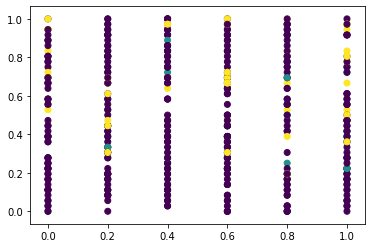

In [48]:
finaldatavalues = df_datascaled.values
features = finaldatavalues[:, :-1]
target = finaldatavalues[:, -1]
X, y = features, target
X = X.astype('float32')
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,  random_state=40)



lr = LogisticRegression()

lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1],c= predictions)

np.mean(predictions == y_test )



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5203426124197003

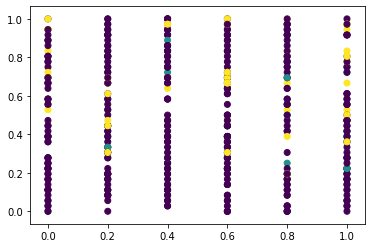

In [48]:
finaldatavalues = df_datascaled.values
features = finaldatavalues[:, :-1]
target = finaldatavalues[:, -1]
X, y = features, target
X = X.astype('float32')
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,  random_state=40)



lr = LogisticRegression()

lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1],c= predictions)

np.mean(predictions == y_test )



In [53]:
df_datascaled['match_winner'].value_counts()

0    2097
1    1343
2    1222
Name: match_winner, dtype: int64

In [56]:
from sklearn.metrics import classification_report


target_names = ['Gana Local', 'Empate', 'Gana Visitante']
print(classification_report(y_test, predictions, target_names=target_names))

                precision    recall  f1-score   support

    Gana Local       0.52      0.94      0.67       220
        Empate       0.36      0.04      0.07       134
Gana Visitante       0.57      0.28      0.38       113

      accuracy                           0.52       467
     macro avg       0.48      0.42      0.37       467
  weighted avg       0.49      0.52      0.43       467



In [27]:
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Expected 2D array, got 1D array instead:
array=[1 0 0 2 2 0 2 0 0 1 0 0 1 2 0 2 1 1 2 1 0 0 2 0 2 2 0 1 0 2 2 0 0 1 0 0 0
 1 2 1 0 1 0 1 1 1 0 2 0 0 1 0 0 1 0 1 1 1 1 1 1 2 2 1 2 0 0 1 0 0 0 1 2 2
 2 1 2 1 0 0 2 1 2 0 1 0 0 0 0 2 0 0 2 1 2 0 1 2 0 0 1 0 0 1 1 1 0 1 2 0 1
 2 0 0 0 2 2 1 2 0 0 1 0 2 0 0 0 0 2 0 0 1 0 0 1 1 2 0 1 0 2 0 0 1 0 1 2 0
 0 0 1 1 1 0 2 1 0 1 0 2 0 2 1 0 1 2 0 1 0 0 0 0 2 0 0 1 1 1 1 1 0 0 0 1 0
 1 2 1 2 2 1 0 0 2 1 0 0 0 2 1 0 0 2 2 1 0 0 1 0 0 0 2 0 2 2 0 1 1 0 2 2 0
 2 1 0 0 0 0 0 2 0 0 1 1 0 1 2 0 0 2 0 1 0 0 2 0 0 2 0 2 0 2 1 0 0 0 0 1 1
 2 0 1 2 0 0 1 2 0 1 1 1 2 0 0 0 2 0 0 0 2 0 2 2 0 2 0 0 0 2 1 2 0 2 0 1 2
 2 2 2 0 0 0 0 0 1 0 0 0 0 2 2 2 2 2 0 0 1 2 2 0 1 0 0 0 0 1 2 1 1 0 0 0 0
 1 0 0 0 0 1 0 0 2 0 1 0 0 2 2 1 2 1 0 2 1 2 1 0 2 1 1 2 0 1 0 0 0 0 1 1 2
 1 0 2 1 0 1 0 0 0 0 0 1 2 1 1 2 0 0 0 1 0 0 0 1 0 2 1 0 1 1 0 2 0 2 0 2 1
 1 1 1 0 1 1 2 0 0 1 0 1 0 1 1 0 1 1 2 0 0 0 1 2 2 2 2 1 0 0 0 0 0 1 0 0 2
 0 0 0 0 0 2 0 2 0 0 0 2 2 1 1 2 1 1 0 0 1 1 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

------ HASTA AQUI ------

In [27]:
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Expected 2D array, got 1D array instead:
array=[1 0 0 2 2 0 2 0 0 1 0 0 1 2 0 2 1 1 2 1 0 0 2 0 2 2 0 1 0 2 2 0 0 1 0 0 0
 1 2 1 0 1 0 1 1 1 0 2 0 0 1 0 0 1 0 1 1 1 1 1 1 2 2 1 2 0 0 1 0 0 0 1 2 2
 2 1 2 1 0 0 2 1 2 0 1 0 0 0 0 2 0 0 2 1 2 0 1 2 0 0 1 0 0 1 1 1 0 1 2 0 1
 2 0 0 0 2 2 1 2 0 0 1 0 2 0 0 0 0 2 0 0 1 0 0 1 1 2 0 1 0 2 0 0 1 0 1 2 0
 0 0 1 1 1 0 2 1 0 1 0 2 0 2 1 0 1 2 0 1 0 0 0 0 2 0 0 1 1 1 1 1 0 0 0 1 0
 1 2 1 2 2 1 0 0 2 1 0 0 0 2 1 0 0 2 2 1 0 0 1 0 0 0 2 0 2 2 0 1 1 0 2 2 0
 2 1 0 0 0 0 0 2 0 0 1 1 0 1 2 0 0 2 0 1 0 0 2 0 0 2 0 2 0 2 1 0 0 0 0 1 1
 2 0 1 2 0 0 1 2 0 1 1 1 2 0 0 0 2 0 0 0 2 0 2 2 0 2 0 0 0 2 1 2 0 2 0 1 2
 2 2 2 0 0 0 0 0 1 0 0 0 0 2 2 2 2 2 0 0 1 2 2 0 1 0 0 0 0 1 2 1 1 0 0 0 0
 1 0 0 0 0 1 0 0 2 0 1 0 0 2 2 1 2 1 0 2 1 2 1 0 2 1 1 2 0 1 0 0 0 0 1 1 2
 1 0 2 1 0 1 0 0 0 0 0 1 2 1 1 2 0 0 0 1 0 0 0 1 0 2 1 0 1 1 0 2 0 2 0 2 1
 1 1 1 0 1 1 2 0 0 1 0 1 0 1 1 0 1 1 2 0 0 0 1 2 2 2 2 1 0 0 0 0 0 1 0 0 2
 0 0 0 0 0 2 0 2 0 0 0 2 2 1 1 2 1 1 0 0 1 1 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,  random_state=40)


,year,round,division,local_goals,visitor_goals,points_local,wins_local,draws_local,losses_local,gf_local,...,avg_local,pos_local,points_visitor,wins_visitor,draws_visitor,losses_visitor,gf_visitor,ga_visitor,avg_visitor,pos_visitor
858,2018,13,1,1,1,30,9.0,3.0,0.0,32,...,21.0,2,34,11.0,1.0,0.0,33,4,29.0,1
1595,2020,13,1,3,1,11,3.0,2.0,7.0,9,...,-9.0,17,18,5.0,3.0,4.0,25,16,9.0,8
3815,2019,36,2,0,1,0,5.0,6.0,24.0,16,...,-25.0,22,47,13.0,8.0,14.0,34,36,-2.0,11
4044,2020,19,2,3,1,25,7.0,4.0,7.0,21,...,-1.0,11,26,6.0,8.0,4.0,19,16,3.0,8
1046,2018,32,1,0,1,40,11.0,7.0,13.0,36,...,-9.0,10,35,11.0,2.0,18.0,28,45,-17.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103,2021,27,1,0,0,28,7.0,7.0,12.0,23,...,-12.0,13,25,5.0,10.0,11.0,25,37,-12.0,16
3603,2019,16,2,2,1,27,7.0,6.0,2.0,21,...,9.0,5,33,10.0,3.0,2.0,19,6,13.0,1
3340,2018,29,2,1,2,34,8.0,10.0,10.0,24,...,-10.0,16,22,6.0,4.0,18.0,33,52,-19.0,20
3064,2018,4,2,0,1,1,0.0,1.0,2.0,0,...,-4.0,21,1,0.0,1.0,2.0,0,3,-3.0,20


               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.204011    0.162180    0.139068    0.114342    0.173732    0.253615   
std      0.169550    0.141277    0.126242    0.110623    0.140888    0.158843   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.087389    0.067938    0.057326    0.044163    0.079508    0.152714   
50%      0.157080    0.129447    0.107753    0.090942    0.141517    0.220236   
75%      0.251106    0.202958    0.185447    0.139563    0.237319    0.333042   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.320472    0.285114    0.252485    0.281652  ...    0.160047   
std      0.167175    0.187767    0.175311    0.1

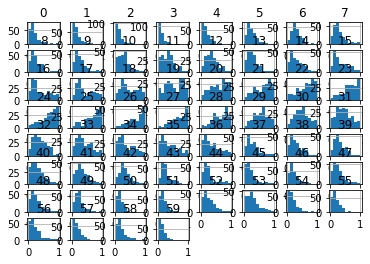

               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.204011    0.162180    0.139068    0.114342    0.173732    0.253615   
std      0.169550    0.141277    0.126242    0.110623    0.140888    0.158843   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.087389    0.067938    0.057326    0.044163    0.079508    0.152714   
50%      0.157080    0.129447    0.107753    0.090942    0.141517    0.220236   
75%      0.251106    0.202958    0.185447    0.139563    0.237319    0.333042   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.320472    0.285114    0.252485    0.281652  ...    0.160047   
std      0.167175    0.187767    0.175311    0.1

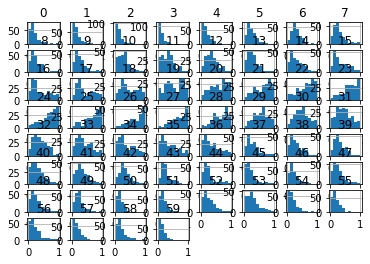

In [37]:

# visualize a minmax scaler transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()

# visualize a minmax scaler transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
dataset.hist()
plt.show()

In [90]:
data = pd.read_csv('plotting_data', index_col = [0])
data = data.drop(['local_goals', 'visitor_goals'], axis=1)
data.head()

,year,round,division,points_local,wins_local,draws_local,losses_local,gf_local,ga_local,avg_local,pos_local,points_visitor,wins_visitor,draws_visitor,losses_visitor,gf_visitor,ga_visitor,avg_visitor,pos_visitor,match_winner
0,2016,2,1,1,0.0,1.0,0.0,1,1,0.0,7,3,1.0,0.0,0.0,1,0,1.0,5,0
1,2016,2,1,1,0.0,1.0,0.0,0,0,0.0,10,1,0.0,1.0,0.0,0,0,0.0,13,1
2,2016,2,1,3,1.0,0.0,0.0,1,0,1.0,4,1,0.0,1.0,0.0,0,0,0.0,9,0
3,2016,2,1,3,1.0,0.0,0.0,2,1,1.0,2,1,0.0,1.0,0.0,0,0,0.0,11,0
4,2016,2,1,1,0.0,1.0,0.0,0,0,0.0,12,1,0.0,1.0,0.0,1,1,0.0,6,0


In [91]:
data.year

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
4657    2021
4658    2021
4659    2021
4660    2021
4661    2021
Name: year, Length: 4662, dtype: int64

In [103]:

features = data.values[:, :-1]
target = data.values[:, -1]
X, y = features, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

X_test_scaled = scaler.transform(X_test)

y_pred = model.predict(X_test_scaled)

np.mean(y_pred == y_test)

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pablo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.5074946466809421

In [104]:
from sklearn.metrics import classification_report


target_names = ['Gana Local', 'Empate', 'Gana Visitante']
print(classification_report(y_test, predictions, target_names=target_names))

                precision    recall  f1-score   support

    Gana Local       0.50      0.88      0.64       218
        Empate       0.38      0.04      0.07       131
Gana Visitante       0.51      0.31      0.38       118

      accuracy                           0.50       467
     macro avg       0.46      0.41      0.36       467
  weighted avg       0.47      0.50      0.41       467



In [109]:
features = data.values[:, :-1]
target = data.values[:, -1]
X, y = features, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

X_test_scaled = scaler.transform(X_test)

y_pred = model.predict(X_test_scaled)

np.mean(y_pred == y_test)

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3683083511777302

In [110]:
target_names = ['Gana Local', 'Empate', 'Gana Visitante']
print(classification_report(y_test, predictions, target_names=target_names))

                precision    recall  f1-score   support

    Gana Local       0.50      0.88      0.64       218
        Empate       0.38      0.04      0.07       131
Gana Visitante       0.51      0.31      0.38       118

      accuracy                           0.50       467
     macro avg       0.46      0.41      0.36       467
  weighted avg       0.47      0.50      0.41       467



In [ ]:

values = X_train.values[:, :-1]
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(values)
df_xtrain = DataFrame(X_train_scaled)
df_datascaled = pd.concat([df_datascaled, pd.DataFrame(data['match_winner'])], axis=1)
print(df_datascaled.describe())

finaldatavalues = df_datascaled.values
features = finaldatavalues[:, :-1]
target = finaldatavalues[:, -1]
X, y = features, target
X = X.astype('float32')
y = y.astype('int')

####




lr = LogisticRegression()

lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1],c= predictions)

np.mean(predictions == y_test )



In [60]:
features = data[:, :-1]
target = data[:, -1]

X, y = features, target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = SVC()
model.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

TypeError: '(slice(None, None, None), slice(None, -1, None))' is an invalid key

In [56]:
features = data[:, :-1].values
target = data[:, -1].values
X, y = features, target
X = X.astype('float32')
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,  random_state=40)
values = X_train.values[:, :-1]
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [53]:
X_train

array([[0.3999939 , 0.30555555, 0.        , ..., 0.3027523 , 0.04494382,
        0.6076923 ],
       [0.7999878 , 0.30555555, 0.        , ..., 0.2293578 , 0.17977528,
        0.45384616],
       [0.6000061 , 0.9444444 , 1.        , ..., 0.3119266 , 0.40449437,
        0.36923078],
       ...,
       [0.3999939 , 0.75      , 1.        , ..., 0.3027523 , 0.58426964,
        0.23846154],
       [0.3999939 , 0.05555556, 1.        , ..., 0.        , 0.03370786,
        0.36153847],
       [0.3999939 , 0.9166666 , 1.        , ..., 0.3119266 , 0.43820226,
        0.34615386]], dtype=float32)